<h1>SI 305 Discussion 10: Statistical Analysis</h1>

This week we'll be covering statistical analysis in Python. There are lots of packages you can use to analyze relationships in your data. In this discussion we'll focus on <a href = "https://www.statsmodels.org/stable/index.html">statsmodel.</a> Another useful package that we won't cover today is <a href = "https://scikit-learn.org/stable/">sklearn.</a> 

We'll be using the waste water scan data. This data measures the amount of COVID-19, influenza and other viruses in wastewater. For more details see the <a href = "https://docs.google.com/document/d/1vmTYziZxRMxANLVG0ly1c4-3scamvvXEkpsISZ_dF3E/edit">data dictionary.</a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1kQ6oEeNNntgQ0V2rv21_osuMO9Xr_ni6but7tVtrYjw/gviz/tq?tqx=out:csv")

In [3]:
df['collection_date'] = pd.to_datetime(df['collection_date'])
df['collection_month'] = df['collection_date'].dt.month

In [4]:
def assign_month(s):
    if s < 3 or s == 12:
        return 'winter'
    elif s <= 5:
        return 'spring'
    elif s <= 8:
        return 'summer'
    else:
        return 'fall'

df['season'] = df['collection_month'].apply(assign_month)

In [5]:
df.head()

,sample_id,collection_date,dilution,bcov_recovery,bcov_recovery_lci,bcov_recovery_uci,city,state,name,site_name,...,HAV_gc_g_dry_weight_lci,HAV_gc_g_dry_weight_uci,Rota_gc_g_dry_weight,Rota_gc_g_dry_weight_lci,Rota_gc_g_dry_weight_uci,HPIV_gc_g_dry_weight,HPIV_gc_g_dry_weight_lci,HPIV_gc_g_dry_weight_uci,collection_month,season
0,51-220627,2022-06-27,1,2.221,1.884,2.576,Ann Arbor,Michigan,"Ann Arbor, MI",City of Ann Arbor Wastewater Treatment Plant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,summer
1,51-220629,2022-06-29,1,1.234,1.040,1.451,Ann Arbor,Michigan,"Ann Arbor, MI",City of Ann Arbor Wastewater Treatment Plant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,summer
2,51-220701,2022-07-01,1,0.747,0.534,1.010,Ann Arbor,Michigan,"Ann Arbor, MI",City of Ann Arbor Wastewater Treatment Plant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,summer
3,51-220704,2022-07-04,1,0.874,0.511,1.220,Ann Arbor,Michigan,"Ann Arbor, MI",City of Ann Arbor Wastewater Treatment Plant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,summer
4,51-220706,2022-07-06,1,1.540,1.280,1.833,Ann Arbor,Michigan,"Ann Arbor, MI",City of Ann Arbor Wastewater Treatment Plant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,summer


<h2>Live Coding Example: Do we detect higher levels of COVID-19 in certain seasons?</h2>

We went ahead and created a new variable called `season` for you. For the sake of this excersize, we'll assume 

* Winter = December, January, February
* Spring = March, April, May
* Summer = June, July, August
* Fall = September, October, November

<h3>1.A: Create a plot that shows the relationship between COVID-19 and season</h3>
Before we go through the effort of doing a full statistical analysis, it can be helpful to plot our data to see if there's any relationship. Let's create a plot that shows the relationship between COVID-19 and season.

There are a few different ways COVID-19 levels are measured in this dataset. We'll use the variable `N_Gene_gc_g_dry_weight`

<BarContainer object of 4 artists>

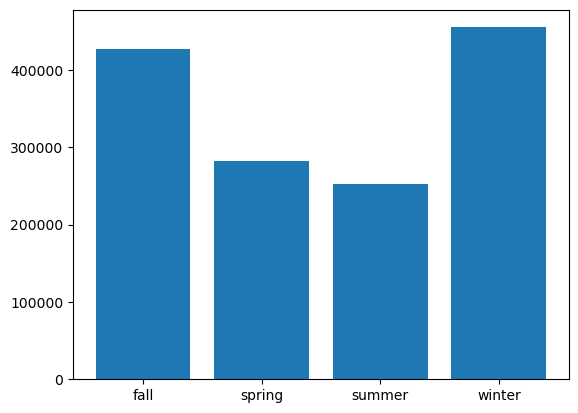

In [8]:
avg_covid = df.groupby('season')['N_Gene_gc_g_dry_weight'].mean()
avg_covid = avg_covid.reset_index()

plt.bar(height = avg_covid['N_Gene_gc_g_dry_weight'], x = avg_covid['season'])

<h3>1.B Analysis of Variance</h3>

We are interested in how each individual season impacts COVID-19 levels. This means a type 2 anova is most appropriate. For a refresher on what type of ANOVA to use, see <a href = "https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html">this page</a>

In [11]:
season_ols = ols('N_Gene_gc_g_dry_weight ~ C(season)', data = df).fit()

In [13]:
sm.stats.anova_lm(season_ols, typ = 2)

,sum_sq,df,F,PR(>F)
C(season),1.569946e+12,3.0,4.098888,0.007534
Residual,2.502382e+13,196.0,NaN,NaN


<h3>1.C Interpretation</h3>

One of the most important parts of doing statistical analysis is interpretting your results *in the context of the problem.* Let's write 1-2 sentences explaining what these results mean.

you answer here

<h2>Question 1: What is the relationship between COVID-19 levels and influenza levels?</h2>

Use the column `Influenza_A_gc_g_dry_weight` to measure influenza levels

<h3>1.A: Create a plot that shows the relationship between COVID-19 and influenza</h3>

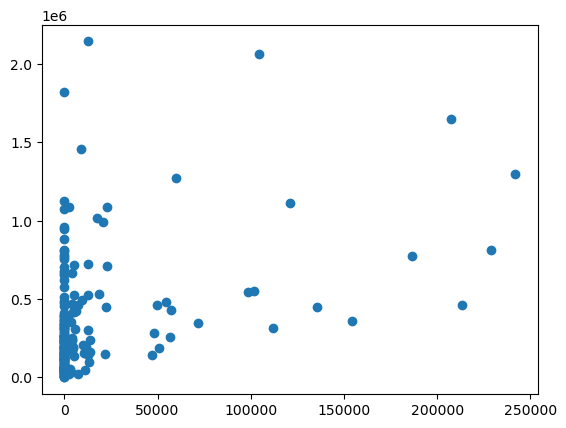

In [16]:
plt.scatter(df['Influenza_A_gc_g_dry_weight'], df['N_Gene_gc_g_dry_weight'])

<h3>1.B: Calculate the correlation between these two variables</h3>

In [18]:
df[['N_Gene_gc_g_dry_weight', 'Influenza_A_gc_g_dry_weight']].corr()

,N_Gene_gc_g_dry_weight,Influenza_A_gc_g_dry_weight
N_Gene_gc_g_dry_weight,1.000000,0.389812
Influenza_A_gc_g_dry_weight,0.389812,1.000000


<h3>1.C: Interpret in context</h3>

Your answer here

<h3>1.D: Linear Regression</h3>

Let's predict influenza levels based on COVID-19 levels and the season

In [19]:
model = ols('Influenza_A_gc_g_dry_weight ~ N_Gene_gc_g_dry_weight + C(season)', data = df)
result = model.fit()

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Influenza_A_gc_g_dry_weight   R-squared:                       0.384
Model:                                     OLS   Adj. R-squared:                  0.372
Method:                          Least Squares   F-statistic:                     30.43
Date:                         Wed, 01 Nov 2023   Prob (F-statistic):           1.12e-19
Time:                                 16:43:32   Log-Likelihood:                -2357.1
No. Observations:                          200   AIC:                             4724.
Df Residuals:                              195   BIC:                             4741.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5778.0839   5010.213     -1.153      0.250   -1.57e+04    4103.079
C(season)[T.spring]    -3330.0325   6870.529     -0.485      0.628   -1.69e+04    1.02e+04
C(season)[T.summer]    -2511.3224   5855.376     -0.429      0.668   -1.41e+04    9036.675
C(season)[T.winter]     4.849e+04   6697.611      7.240      0.000    3.53e+04    6.17e+04
N_Gene_gc_g_dry_weight     0.0350      0.006      5.435      0.000       0.022       0.048
==============================================================================
Omnibus:                      121.153   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.220
Skew:                           2.267   Prob(JB):                    6.56e-190
Kurtosis:                      12.165   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.predict()

<h3>1.E: Interpret in context</h3>

There are lots of interesting results from our linear regression! You don't have to interpret everything, but here are some things to pay attention to when reading your regression results:

* <a href = "https://people.duke.edu/~rnau/rsquared.htm">R-squared</a>
* <a href = "https://stats.oarc.ucla.edu/spss/library/spss-libraryunderstanding-and-interpreting-parameter-estimates-in-regression-and-anova/">Parameter estimates and their p-value</a>
* <a href = "https://stats.oarc.ucla.edu/stata/output/regression-analysis/">F statistic</a>

<h2>Bonus Question</h2>
This is a bonus question for you to attempt individually. This can only help your grade, so try your best! Make sure to submit your completed notebook to Vocareum. 

Create a linear regression model that predicts `Noro_G2_gc_g_dry_weight` based on `Influenza_A_gc_g_dry_weight`, the year the sample was collected and the `dilution` field. Save your fitted model to the variable `bonus_model`